<a href="https://colab.research.google.com/github/Aleeshbah11/Data-Cleaning/blob/main/Data_Cleaning_(titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

current_directory = os.getcwd()

print(f"current working directory: {current_directory}")

current working directory: /content


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


cell [12]
1.
5# age and 10# cabin has unequal entries which shouldve been 891 like the rest
indicating non uniformity in the dataset
2.
Dtypes are mixed as some are object, float and integers. need to make them similar for better numerical operations


In [ ]:

# categorical indicates the string type data such as name and sex

# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('categorical columns:', cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('num columns:', num_col)

categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
num columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
df[cat_col].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
df[cat_col].nunique()

,0
Name,891
Sex,2
Ticket,681
Cabin,147
Embarked,3


In [ ]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [ ]:
# ignoring name and ticket columns because they are less unique

df1= df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [ ]:
df1.isnull().sum()/df1.shape[0]*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Cabin,77.104377
Embarked,0.224467


In [ ]:
# how much % null values we have in each columns

round((df1.isnull().sum()/df1.shape[0])*100,2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Fare,0.00
Cabin,77.10
Embarked,0.22


In [ ]:
#we have 77% null values in cabin so we will drop this column

df2= df1.drop(columns=['Cabin'])
df2.shape

(891, 9)

In [ ]:
#we have 0.22% null values in embarked so we will only drop this row

df2.dropna(subset=['Embarked'], axis= 0, inplace=True)
df2.shape

(889, 9)

# Handeling Missing data
Mean imputation: when data is normally distributed (no outlier)
Median imputation: when outlier is present

In [ ]:
df3 = df2.fillna(df2.Age.mean())
df3.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


cell [24] indicates there are no null values now because missing data was handeled using mean imputation

In [ ]:
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# Handeling outliers

Outliers: extreme values deviating significantly from the majority of the data.
Techniques such as clustering, interpolation, or transformation can be used to handle outliers

## Box plot method

 A box plot (box-and-whisker plot) is a graphical representation of a dataset distribution. It shows a variable **median**, **quartiles**, and **potential outliers**.

 - The line inside the box --> the median
 - The box --> the interquartile range (IQR)
 - The whiskers extend to the most extreme non-outlier values within 1.5 times the IQR.
 - Individual points beyond the whiskers are considered potential outliers.

Text(0.5, 1.0, 'Age box plot')

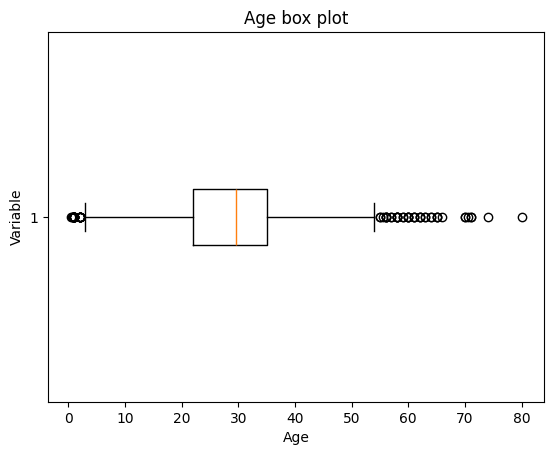

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df3['Age'], vert= False)
plt.xlabel('Age')
plt.ylabel('Variable')
plt.title('Age box plot')


cell [30] indicates that the median is 30, interquartile range extends from 20 to 25 since that seems like the box dimension. The whisker extending from left shows that from 5 to 20(till the box left side) there are no outliers. similarly, right whisker shows from 35 to 55 no outlier values.
the potential outliers aka the individual points lies from 55 ownward and 0 to 5.

In [ ]:

#calculate mean
mean = df3['Age'].mean()
print('mean:',mean)

#calculate Age
std= df3['Age'].std()
print('std:', std)

#calculate upper and lower bounds
lower_bound =mean - std*2
upper_bound = mean+ std*2
print('lower bound:', lower_bound)
print('upper bound:', upper_bound)


mean: 29.642092696629216
std: 12.968346294351784
lower bound: 3.705400107925648
upper bound: 55.578785285332785


## drop the outlier

we know the values of outlier because of box plot, now apply conditions and eliminate the outliers from dataframe

In [ ]:
df4= df3[(df3['Age']>=lower_bound) & (df3['Age']<=upper_bound)]
df4

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.642093,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


#Data Transformation
Converting the data from one form to another to make it more suitable for analysis.
Techniques such as normalization, scaling, or encoding are used for this

In [ ]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

## Scaling

used when different features lie on different scale magnitudes.
important because some algo can be sensitive to the magnitudes

### Min-Max scaling

transforms the scale from minimum 0 to maximum 1.
it does no affect the original data distribution at all

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler(feature_range=(0,1))

#numerical column
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
X1=X

X1[num_col_]=Scaler.fit_transform(X1[num_col_])
X1.head()

<ipython-input-54-98dd41032f53>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[num_col_]=Scaler.fit_transform(X1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


# Z-Score scaling

aka standardization

Make values to have a mean of 0 and a standard deviation of 1.
- suitable for algorithms that assume a Gaussian distribution or require features to have zero mean and unit variance